#### Predicting players rating

In this project you are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.The dataset you are going to use is from European Soccer Database(https://www.kaggle.com/hugomathien/soccer)has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.

Download the data in the same folder and run the following commmand to get it in the environment

##### About the Dataset

###### The ultimate Soccer database for data analysis and machine learning

The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch.
- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, you would normally see the same in the dataset.


###### Python skills required to complete this project

###### SQL:

The data is in SQL database so students need to retrive using query language. They also need to know how to connect SQL database woth python. The library we are using for this in 'sqlite3'. SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring. It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249. You do not need to install this module separately because it is shipped by default along with Python version 2.5.x onwards.

To use sqlite3 module, you must first create a connection object that represents the database and then optionally you can create a cursor object, which will help you in executing all the SQL statements.

###### Pandas:

Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Python with Pandas is used in a wide range of fields including academic and commercial domains including finance, economics, Statistics, analytics, etc.In this tutorial, we will learn the various features of Python Pandas and how to use them in practice.

###### Scikit Learn

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. This stack that includes:

- NumPy: Base n-dimensional array package
- SciPy: Fundamental library for scientific computing
- Matplotlib: Comprehensive 2D/3D plotting
- IPython: Enhanced interactive console
- Sympy: Symbolic mathematics
- Pandas: Data structures and analysis

Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides learning algorithms and is named scikit-learn.

The vision for the library is a level of robustness and support required for use in production systems. This means a deep focus on concerns such as easy of use, code quality, collaboration, documentation and performance.

###### Machine Learning skills required to complete the project

###### Supervised learning

Supervised learning deals with learning a function from available training data. A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples.

###### Regression

Regression is a parametric technique used to predict continuous (dependent) variable given a set of independent variables. It is parametric in nature because it makes certain assumptions (discussed next) based on the data set. If the data set follows those assumptions, regression gives incredible results.

###### Model evaluation

Student must know how to judge a model on unseen data. What metric to select to judge the performance

###### Import Libraries

In [3]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from IPython.display import display
%matplotlib inline

##### Read Data from the Database into pandas

In [5]:
# Create your connection.
cnx = sqlite3.connect(r'F:\Data Science Master\Data\soccer\database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [6]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
df.set_index('id', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null float64
spri

In [9]:
df.describe(include='all')

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183978,183142.000000,183142.000000,183142,180748,183142,183142.000000,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
unique,NaN,NaN,197,NaN,NaN,2,8,19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2007-02-22 00:00:00,NaN,NaN,right,medium,medium,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,11794,NaN,NaN,138409,125070,130846,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,165671.524291,135900.617324,NaN,68.600015,73.460353,NaN,NaN,NaN,55.086883,49.921078,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53851.094769,136927.840510,NaN,7.041139,6.592271,NaN,NaN,NaN,17.242135,19.038705,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,2.000000,2625.000000,NaN,33.000000,39.000000,NaN,NaN,NaN,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,155798.000000,34763.000000,NaN,64.000000,69.000000,NaN,NaN,NaN,45.000000,34.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,183488.000000,77741.000000,NaN,69.000000,74.000000,NaN,NaN,NaN,59.000000,53.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,199848.000000,191080.000000,NaN,73.000000,78.000000,NaN,NaN,NaN,68.000000,65.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000


##### Handling Null Values

In [10]:
#Finding all Null Values
df.isnull().sum(axis=0)

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

In [11]:
#Drop rows where atleast 836 records for 38 columns out of 41 columns are NaN because they have all columns as NaN except the columns named 'player_fifa_api_id', 'player_api_id' and 'date' which has no significance in predicting overall rating of a player.
df.dropna(axis=0, how='all', thresh=38, inplace=True)

In [12]:
df.isnull().sum()

player_fifa_api_id       0
player_api_id            0
date                     0
overall_rating           0
potential                0
preferred_foot           0
attacking_work_rate    911
defensive_work_rate      0
crossing                 0
finishing                0
heading_accuracy         0
short_passing            0
volleys                  0
dribbling                0
curve                    0
free_kick_accuracy       0
long_passing             0
ball_control             0
acceleration             0
sprint_speed             0
agility                  0
reactions                0
balance                  0
shot_power               0
jumping                  0
stamina                  0
strength                 0
long_shots               0
aggression               0
interceptions            0
positioning              0
vision                   0
penalties                0
marking                  0
standing_tackle          0
sliding_tackle           0
gk_diving                0
g

##### Heatmap Correlation

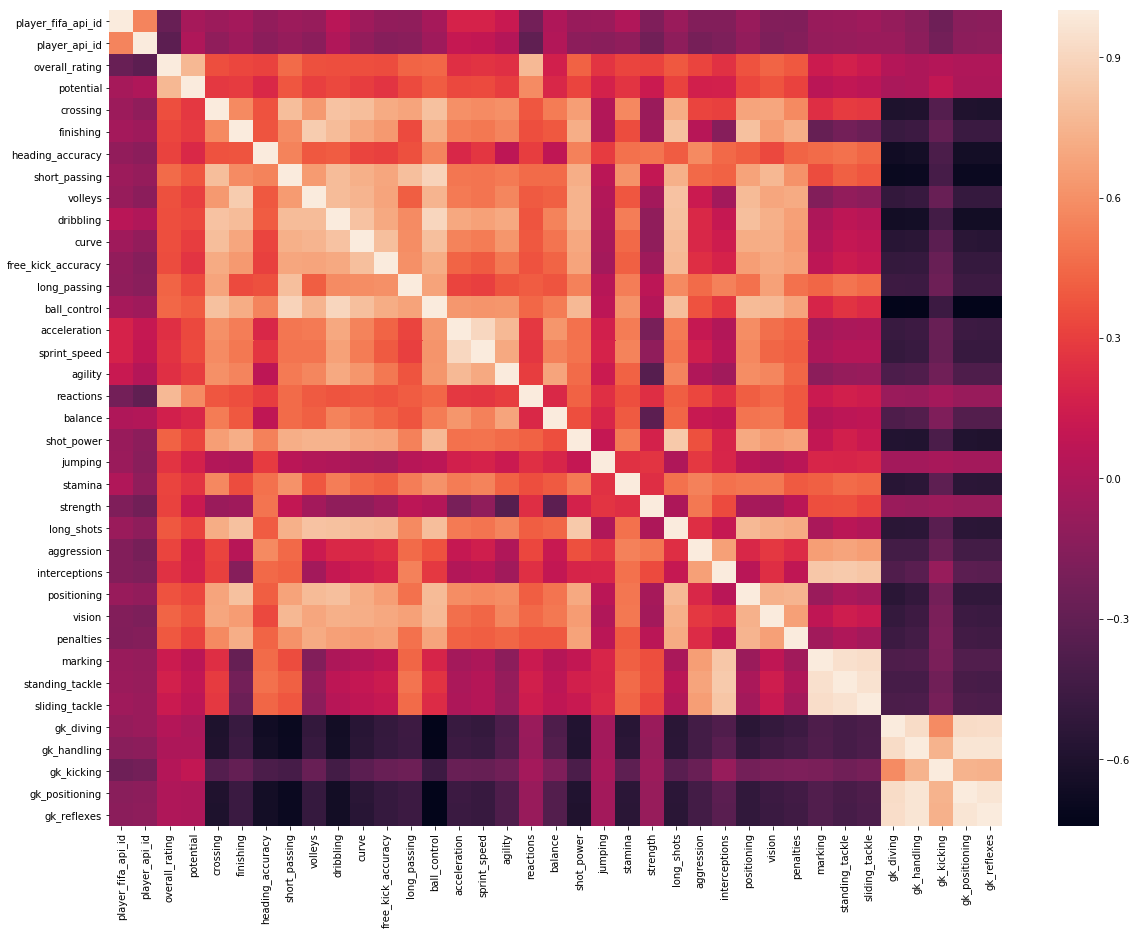

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

##### Finding all Categorical Values

In [15]:
df.preferred_foot.value_counts()

right    136953
left      44312
Name: preferred_foot, dtype: int64

In [16]:
df.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [17]:
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
o           1328
_0           911
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

##### One Hot Encoding

In [18]:
df_dummies_preferredfoot = pd.get_dummies(df.preferred_foot, drop_first=True, prefix='preferred')
df_dummies_attackingworkrate = pd.get_dummies(df.attacking_work_rate, drop_first=True, prefix='attacking')
df_dummies_defensiveworkrate = pd.get_dummies(df.defensive_work_rate, drop_first=True, prefix='defensive')


In [19]:
#Joining these new variables to the 
df = df.join(df_dummies_preferredfoot)
df = df.join(df_dummies_attackingworkrate)
df = df.join(df_dummies_defensiveworkrate)

In [20]:
#Dropping insignificant variables
numerical_df = df.drop(['player_fifa_api_id', 'player_api_id', 'date', 'preferred_foot', 'attacking_work_rate', 
                        'defensive_work_rate'], axis=1)


In [21]:
numerical_df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,defensive_9,defensive__0,defensive_ean,defensive_es,defensive_high,defensive_low,defensive_medium,defensive_o,defensive_ormal,defensive_tocky
id,,,,,,,,,,,,,,,,,,,,,
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
2,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
3,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,1,0,0,0
5,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,1,0,0,0


##### Fitting Regression Model

In [22]:
numerical_df.columns

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_right',
       'attacking_high', 'attacking_le', 'attacking_low', 'attacking_medium',
       'attacking_norm', 'attacking_stoc', 'attacking_y', 'defensive_1',
       'defensive_2', 'defensive_3', 'defensive_4', 'defensive_5',
       'defensive_6', 'defensive_7', 'defensive_8', 'defensive_9',
       'defensive__0', 'defensive_ean', 'defensive_es', 'defensive_high',
       'defensive_low', 'defensive_medium', 'defensive_o', 'defen

We remove below columns based on Backward Elimination using P-values considering the two important thumbrules. 

 1) P values for the selected columns are less than 0.05 
 
 2) R-squared value 0.786 and Adj. R-squared value 0.786 indicates the model is a better fit between overfitting and underfitting
 
 defensive_4, attacking_medium, defensive_tocky, attacking_stoc, defensive_5, attacking_le, defensive_ean, volleys

In [24]:
#Building Linear Model using statsmodel
lm = smf.ols(formula='overall_rating ~ crossing + finishing + heading_accuracy + short_passing + dribbling + curve + free_kick_accuracy + long_passing + ball_control + acceleration + sprint_speed + agility + reactions + balance + shot_power + jumping + stamina + strength + long_shots + aggression + interceptions + positioning + vision + penalties + marking + standing_tackle + sliding_tackle + gk_diving + gk_handling + gk_kicking + gk_positioning + gk_reflexes + attacking_high +  attacking_low + attacking_norm +  attacking_y +  defensive_1 + defensive_2 + defensive_3 +  defensive_6 + defensive_7 + defensive_8 + defensive_9 + defensive__0 + defensive_es + defensive_high + defensive_low + defensive_medium + defensive_o + defensive_ormal +  preferred_right', data=numerical_df).fit()
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                 1.362e+04
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:20:48   Log-Likelihood:            -4.7076e+05
No. Observations:              181265   AIC:                         9.416e+05
Df Residuals:                  181215   BIC:                         9.421e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.7659      0.159     29.919      0.000       4.454       5.078
crossing              -0.0100      0.001    -10.284      0.000      -0.012      -0.008
finishing              0.0129      0.001     12.475      0.000       0.011       0.015
heading_accuracy       0.0994      0.001    105.795      0.000       0.098       0.101
short_passing          0.0759      0.002     47.422      0.000       0.073       0.079
dribbling             -0.0099      0.001     -7.268      0.000      -0.013      -0.007
curve                  0.0116      0.001     12.575      0.000       0.010       0.013
free_kick_accuracy     0.0102      0.001     12.251      0.000       0.009       0.012
long_passing           0.0168      0.001     15.421      0.000       0.015       0.019
ball_control           0.2299      0.002    128.079      0.000       0.226       0.233
acceleration           0.0401      0.002     25.031      0.000       0.037       0.043
sprint_speed           0.0492      0.002     32.482      0.000       0.046       0.052
agility               -0.0143      0.001    -12.113      0.000      -0.017      -0.012
reactions              0.2763      0.001    226.237      0.000       0.274       0.279
balance                0.0030      0.001      3.342      0.001       0.001       0.005
shot_power             0.0231      0.001     22.751      0.000       0.021       0.025
jumping                0.0124      0.001     14.569      0.000       0.011       0.014
stamina               -0.0158      0.001    -16.489      0.000      -0.018      -0.014
strength               0.0600      0.001     61.326      0.000       0.058       0.062
long_shots            -0.0208      0.001    -19.695      0.000      -0.023      -0.019
aggression             0.0102      0.001     12.778      0.000       0.009       0.012
interceptions          0.0178      0.001     20.840      0.000       0.016       0.020
positioning           -0.0185      0.001    -20.133      0.000      -0.020      -0.017
vision                 0.0081      0.001      8.011      0.000       0.006       0.010
penalties              0.0153      0.001     17.526      0.000       0.014       0.017
marking                0.0327      0.001     25.104      0.000       0.030       0.035
standing_tackle        0.0132      0.002      8.744      0.000       0.010       0.016
sliding_tackle        -0.0270      0.001    -21.043      0.000      -0.030      -0.024
gk_diving              0.2072      0.002    122.424      0.000       0.204       0.211
gk_handling            0.0572      0.002     25.615      0.000       0.053       0.062
gk_kicking            -0.0289      0.001    -39.772      0.000      -0.030      -0.027
gk_positioning         0.0777      0.002     34.980      0.000       0.073       0.082
gk_reflexes            0.0467      0.0

In [25]:
#Splitting the dataset into Training set and Testset
X = numerical_df.loc[:,['crossing','finishing','heading_accuracy','short_passing','dribbling','curve','free_kick_accuracy','long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance','shot_power','jumping','stamina','strength','long_shots','aggression','interceptions','positioning','vision','penalties','marking','standing_tackle','sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','attacking_high','attacking_low','attacking_norm','attacking_y','defensive_1','defensive_2','defensive_3','defensive_6','defensive_7','defensive_8','defensive_9','defensive__0','defensive_es','defensive_high','defensive_low','defensive_medium','defensive_o','defensive_ormal','preferred_right']].values
y = numerical_df.loc[:,['overall_rating']].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

##### Multiple Linear Regression Model


In [26]:
#Fitting Multiple Linear Regression to the Training set using Scikit learn
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

In [27]:
model.coef_

array([[-0.01097017,  0.01294496,  0.09901524,  0.07616119, -0.01157857,
         0.01225716,  0.01001859,  0.01685518,  0.23179594,  0.03852819,
         0.0505791 , -0.01359534,  0.27591917,  0.00326388,  0.02276042,
         0.01263772, -0.01595509,  0.05998826, -0.02054381,  0.01071303,
         0.01817527, -0.01835354,  0.00778765,  0.01505753,  0.03165124,
         0.01304402, -0.02616935,  0.20825364,  0.05610745, -0.02834946,
         0.07729314,  0.046879  ,  0.13375479,  1.59039159,  0.60571726,
         1.727272  ,  2.01342623,  0.97879513,  1.4512086 ,  1.69220481,
         1.91731199,  1.92507689,  1.09294202,  0.67828779,  1.727272  ,
         1.58457264,  1.91454931,  1.26973021,  0.97595892,  0.60571726,
        -0.05928746]])

In [28]:
model.intercept_

array([4.73106734])

In [29]:
model.score(X_train, y_train)

0.7871993300319079

In [30]:
model.score(X_test, y_test)

0.783573202300398

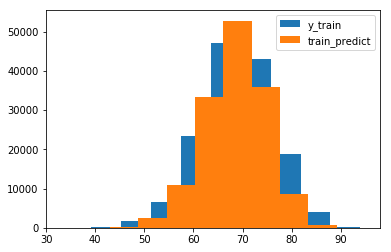

In [31]:
plt.hist(y_train, label='y_train')
plt.hist(model.predict(X_train), label='train_predict')
plt.legend()

In [32]:
#Model Prediction
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [33]:
#Evaluating Multiple Linear Regression Model Performance
print('RMSE Train : ', sqrt(mean_squared_error(y_train_pred, y_train)))
print('RMSE Test : ', sqrt(mean_squared_error(y_test_pred, y_test)))

RMSE Train :  3.24300500830372
RMSE Test :  3.269894369512719


We can see that the RMSE value is less and nearly same. Hence we can say that the model is a good fit.

##### Decision Tree Regression Model

In [37]:
#Fitting Decision Tree Regression Model to the dataset
decisionregressor = DecisionTreeRegressor(random_state=0)
decisionregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [38]:
decisionregressor.score(X_test, y_test)

0.965722542265359

In [39]:
decisionregressor.score(X_train, y_train)

0.9991166446674667

In [40]:
#Model Prediction
y_decision_train_pred = decisionregressor.predict(X_train)
y_decision_test_pred = decisionregressor.predict(X_test)

In [41]:
#Evaluating Decision Tree Regression Model Performance
print('RMSE Train', sqrt(mean_squared_error(y_pred=y_decision_train_pred,y_true= y_train)))
print('RMSE Test' , sqrt(mean_squared_error(y_decision_test_pred, y_test)))

RMSE Train 0.20894348853783676
RMSE Test 1.3013152182568235


We can see that RMSE value for both Training and Test data is different.
Test RMSE is more than Train RMSE which reveals the model may be an overfitting one.

##### XGBoost Model

In [43]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, subsample=0.75, max_depth=7)

In [44]:
#Fitting the Xgboost method
xgb.fit(X_train,y_train)

[08:27:26] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.75, verbosity=1)

In [46]:
#predicting rating of players via Xgboost
y_xgb_test_pred = xgb.predict(X_test)


In [47]:
print('RMSE Test' , sqrt(mean_squared_error(y_test, y_xgb_test_pred)))

RMSE Test 1.258034870219343


In [48]:
#calculating prediction scores of diffrent model with y_test
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test_pred,y_test))
print(explained_variance_score(y_decision_test_pred,y_test))
print(explained_variance_score(y_xgb_test_pred,y_test))

0.7227345488463508
0.9656663743160282
0.9665208863054902


A group of predictors were selected to undergo data preprocessing tasks and fed into two different Machine Learning algorithms like Multiple Linear Regression and DecisionTree Regression.

**Conclusion :**

Predictive analysis report indicates that XGBoost Model works better than Linear Regression Model and DecisionTree Regression Model.

So, players rating is to be predicted with XGBoost Model.